In [1]:
import tweepy
import json
import pandas as pd
import matplotlib.pyplot as plt
import textblob as blob
import numpy as np
import datetime
import time
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

TO DO:
- Store tweeter and thank in status message
- change time to be checking every five minutes

In [2]:
# Twitter API Keys
from config import (consumer_key, 
                    consumer_secret, 
                    access_token, 
                    access_token_secret)

# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth)

In [3]:
# last_check = ""
# OR MAYBE USE THIS raw_time = tweet["created_at"]

*dict_keys(['created_at', 'id', 'id_str', 'text', 'truncated', 'entities', 'metadata', 'source', 'in_reply_to_status_id', 'in_reply_to_status_id_str', 'in_reply_to_user_id', 'in_reply_to_user_id_str', 'in_reply_to_screen_name', 'user', 'geo', 'coordinates', 'place', 'contributors', 'is_quote_status', 'retweet_count', 'favorite_count', 'favorited', 'retweeted', 'lang'])*

In [4]:
#check if any new tweets have been received and store new requests in a list
def check(last_id):
#     date = datetime.datetime.now()
    to_analyze_list = []
    public_tweets = api.search(q="@TheMaddieBot", since_id=last_id) #add this in: , since_id=oldest_tweet
    if public_tweets:
        for tweet in public_tweets:
            
#             print(tweet.entities)
            tweet = tweet._json
    
#             print(tweet.keys())
        
        
#             print(json.dumps(tweet, indent=4))
            
            user = tweet["entities"]["user_mentions"][1]["screen_name"]
            to_analyze_list.append(user)
            last_id = tweet["id"]
            tweet_author = tweet["user"]["screen_name"]
        return to_analyze_list, last_id, tweet_author
#     else:
#         # If there are no new tweets then just return the last id
#         return last_id
    

# check(None)

In [5]:
# test = "@JairPineros"

In [6]:
#Function that gets the last 500 tweets from that handle and analyzes those tweets using VaderSentiment

def lookup_handle(target_user):
#     """Looks up the user(s) last 500 tweets
#     limit to one user lookup at a time (if multiple users wrap in a for loop)
# Loop through each user
    # Variables for holding sentiments
    counter = 0
    
    compound_list = []
    tweets_ago_list = []

    # Use cursor to loop through 25 pages (total 500 tweets)
    for page in tweepy.Cursor(api.user_timeline, id=target_user).pages(25):
        # page is a list of statuses
        for tweet in page:
            tweet_text = json.dumps(tweet._json, indent=3)
            tweet = json.loads(tweet_text)
            text = tweet['text']
            # print(text)

            # Run Vader Analysis on each tweet
            compound = analyzer.polarity_scores(text)["compound"]

            # Add each value to the appropriate array
            compound_list.append(compound)
            tweets_ago_list.append(counter)
            
            counter = counter - 1
            
    return compound_list, tweets_ago_list, target_user


In [7]:
# compound_list, tweets_ago_list, target_user = lookup_handle(test)
# print(compound_list)
# print(tweets_ago_list)
# print(target_user)

In [8]:
# Function to Plot VaderSentiment Graph and save gifure to a file
def plot(x_axis, y_axis, user):
    date = datetime.datetime.now().strftime("%m-%d-%y")
    plt.figure(figsize=(8, 6))
    plt.xlim((-500,0))
    plt.title("Sentiment Analysis of " + user + " (" + date + ")")
    plt.xlabel("Tweets Ago")
    plt.ylabel("Tweet Polarity")

    plt.plot(x_axis, y_axis, marker="o", color="red", linewidth=.25)
    plt.savefig(user + ".png")
    
    plt.show()


In [9]:
# plot(tweets_ago_list, compound_list, user)

In [10]:
# Tweet out VaderSentiment Graph and Thanks to original twitter
def tweet_analysis(filename, user):
    msg = "Analysis of " + user
    api.update_with_media(filename, status=msg)

In [11]:
# image = user + ".png"
# tweet_analysis(image, user)

Last None
sarahlmarx
sarahlmarx not in analyzed_users
@sarahlmarx
[0.6486, -0.3595, 0.8074, 0.4404, 0.0, 0.8832, 0.0, 0.6114, -0.128, 0.7783, 0.9527, 0.0, 0.0, 0.9302, 0.6361, 0.0, 0.8126, 0.0, 0.6988, 0.0, 0.8481, 0.0, 0.0, 0.3182, 0.6114, 0.3612, -0.2617, 0.0, 0.6705, 0.7506, 0.7671, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.4019, 0.7269, 0.0, -0.296, -0.296, 0.9538, 0.5904, -0.296, 0.836, -0.6776, 0.5859, 0.25, 0.0772, 0.8834, 0.3147, 0.0, 0.0, 0.4574, 0.9312, -0.4767, 0.8264, 0.4926, 0.8516, 0.8658, 0.9054, 0.5859, -0.4404, 0.0, 0.0, 0.4201, 0.8016, 0.0, 0.0, 0.0, 0.5719, 0.5859, 0.4404, -0.4215, 0.8126, 0.5719, 0.0, 0.7906, 0.4939, 0.0, 0.1531, -0.296, 0.0, 0.5697, 0.0, -0.168, 0.3612, -0.6369, 0.0, 0.0, 0.0, 0.0, 0.4215, -0.6705, 0.0, 0.0, -0.5106, 0.0, 0.0, 0.836, 0.0, 0.9267, 0.8519, 0.4442, 0.0, 0.7845, 0.0, 0.0, 0.4019, 0.0, 0.7964, 0.1316, 0.7096, 0.0, 0.0, 0.0, 0.0, 0.2023, 0.0, 0.0, 0.0, 0.25, 0.2023, 0.0, 0.3818, 0.6369, 0.0772, 0.5106, -0.4404, 0.6369, 0.0, 0.6369, 0.484, 0.6114,

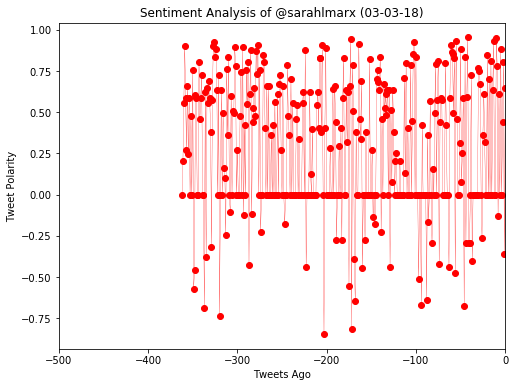

JairPineros
JairPineros not in analyzed_users
@JairPineros
[0.0, 0.0, -0.3682, 0.6114, 0.6428, 0.6249, -0.0258, -0.5719, 0.0, 0.6588, 0.636, 0.7088, 0.4438, 0.0, 0.0, 0.0, 0.0, 0.0, 0.9315, -0.4404, 0.0, 0.7783, 0.5106, 0.0, 0.0, 0.0, 0.4577, 0.5994, 0.9072, -0.1027, 0.0, -0.4939, -0.4588, 0.0, -0.3612, 0.0]
[0, -1, -2, -3, -4, -5, -6, -7, -8, -9, -10, -11, -12, -13, -14, -15, -16, -17, -18, -19, -20, -21, -22, -23, -24, -25, -26, -27, -28, -29, -30, -31, -32, -33, -34, -35]
@JairPineros


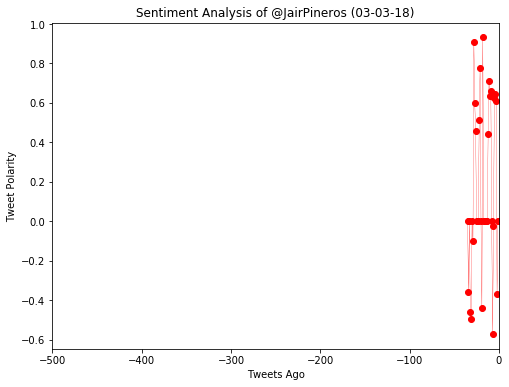

Last 969745682159546368
sarahlmarx
Last 970076252781666305


TypeError: 'NoneType' object is not iterable

In [12]:
last_id = None
analyzed_users = []

# Set timer
t_end = time.time() + 60 * 5
while time.time() < t_end: #while time is less than original time + five minutes
    print("Last", last_id)
    to_analyze_list, last_id, tweet_author = check(last_id)
    for user in to_analyze_list:
        print(user)
        if user not in analyzed_users:
            print(user + " not in analyzed_users")
            handle = "@" + user
            print(handle)
            
            compound_list, tweets_ago_list, target_user = lookup_handle(handle)
            print(compound_list)
            print(tweets_ago_list)
            print(target_user)
            
            image = handle + ".png"
            plot(tweets_ago_list, compound_list, handle)
            tweet_analysis(image, handle)
            
            
            analyzed_users.append(user)
            
            
        
#     print(to_analyze_list)
#     print(last_id)
#     print(tweet_author)
    
    time.sleep(60) #sleep for 60 seconds